In [236]:
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from scipy.spatial import distance
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np

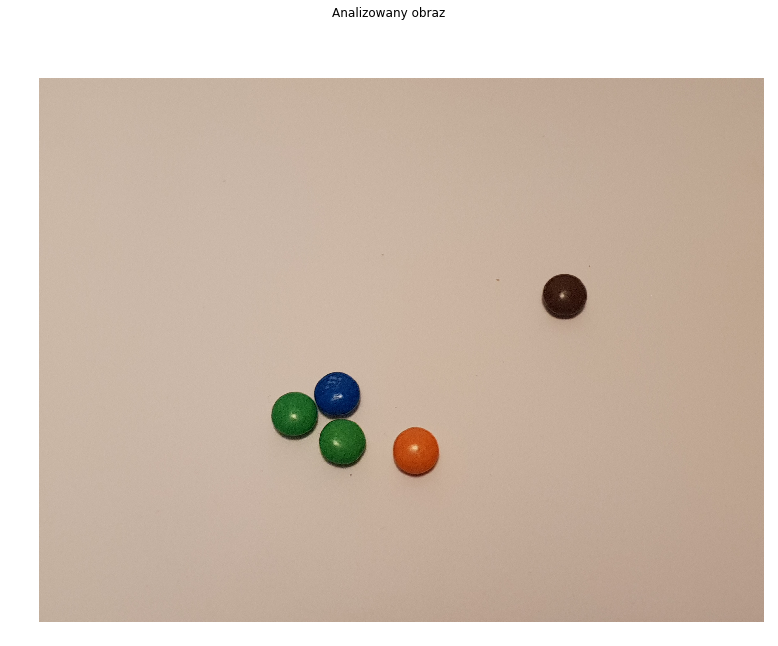

In [237]:
img = io.imread('images/img1.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.suptitle('Analizowany obraz')
plt.show()

In [238]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()
    
def showImg(img, title="Obraz", size=(10,10)):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.suptitle(title)
    plt.show()

/anaconda3/envs/py36/lib/python3.5/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


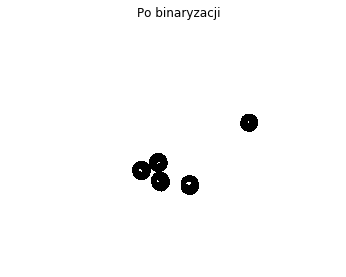

In [239]:
image = img_as_ubyte(rgb2gray(img))
th = 150 
kernel = np.ones((3,3),np.uint8)

th, bimm = cv2.threshold(image, thresh=th, maxval=255, type=cv2.THRESH_OTSU)#Binaryzacja Otsu
showImg(bimm, "Po binaryzacji")

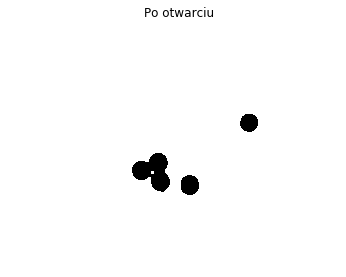

Obiekty na obrazie zajmują powierzchnię 2.30 % obrazu


In [240]:
element = np.ones((3,3),np.uint8)
openingBin = cv2.morphologyEx(bimm, op=cv2.MORPH_OPEN, kernel=element, iterations=20)
showImg(openingBin, "Po otwarciu")
bimm = cv2.bitwise_not(openingBin) #Odwrócenie kolorów
ile_px = np.count_nonzero(bimm)
wielkosc = bimm.shape[0]*bimm.shape[1]
print("Obiekty na obrazie zajmują powierzchnię %.2f" % (ile_px/wielkosc*100) , "% obrazu")

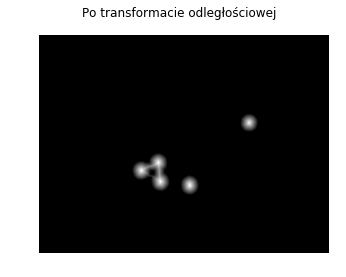

In [241]:
dt = cv2.distanceTransform(bimm, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)
showImg(dt, "Po transformacie odległościowej")

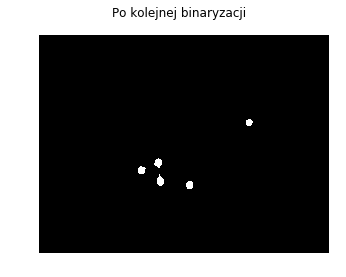

In [242]:
th = 78
th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY)
showImg(bim, "Po kolejnej binaryzacji")

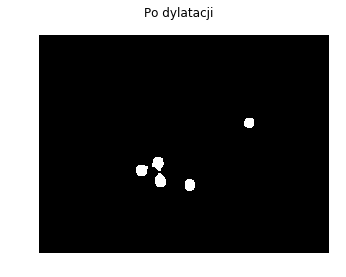

In [243]:
dilateBin = cv2.dilate(bim, kernel=kernel, iterations=20)
showImg(dilateBin, "Po dylatacji")

In [244]:
bim= cv2.bitwise_not(dilateBin) #Odwrócenie kolorów
print('Prog binaryzacji: ', th)
binary = bim < th

label_objects, nb_labels = ndi.label(binary)

print("Obiektów na obrazie wg funkcji wbudowanych jest:\t",nb_labels)

Prog binaryzacji:  78.0
Obiektów na obrazie wg funkcji wbudowanych jest:	 5


/anaconda3/envs/py36/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()


In [245]:
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]

def computeBB(points):
    
    s = len(points)
    my,mx = cog2(points)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)

In [246]:
x = 0
ile = 0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    ile += len(pts)
    x = x + 1
    print('\t\tObiekt nr: ', x ,'\n\nLiczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nWspółczynnik Blaira-Blissa: ', bb,'\nWspółczynnik Fereta: ',feret, '\n\n\n')

print("Obiekty na obrazie zajmują powierzchnię %.2f" % (ile/wielkosc*100) , "% obrazu")


		Obiekt nr:  1 

Liczba punktow:  16812 
Srodek ciezkosci:  [1215.8015703069236, 2921.960206995004] 
Współczynnik Blaira-Blissa:  0.995177666917344 
Współczynnik Fereta:  1.0298507462686568 



		Obiekt nr:  2 

Liczba punktow:  23245 
Srodek ciezkosci:  [1781.0075715207572, 1656.5205420520542] 
Współczynnik Blaira-Blissa:  0.9733968830365677 
Współczynnik Fereta:  1.2547770700636942 



		Obiekt nr:  3 

Liczba punktow:  20651 
Srodek ciezkosci:  [1877.0614982325312, 1426.9494455474312] 
Współczynnik Blaira-Blissa:  0.991437350219087 
Współczynnik Fereta:  0.9556962025316456 



		Obiekt nr:  4 

Liczba punktow:  23170 
Srodek ciezkosci:  [2020.5895986189037, 1686.116012084592] 
Współczynnik Blaira-Blissa:  0.9666609148634219 
Współczynnik Fereta:  1.3835616438356164 



		Obiekt nr:  5 

Liczba punktow:  20166 
Srodek ciezkosci:  [2080.7173956163842, 2095.6792621243676] 
Współczynnik Blaira-Blissa:  0.9913503912736541 
Współczynnik Fereta:  1.1654676258992807 



Obiekty na obrazie 